In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = 'C:/Users/msi-/Desktop/Percent_Change_in_Consumer_Spending.csv'
data = pd.read_csv(file_path)


# Display the first few rows
data.head()

,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)","Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)"
0,900,01/13/2020,-1.760,-5.43,-13.8,-5.220,-2.760,0.89,0.466,-3.240,-3.650
1,2500,01/13/2020,-0.220,-2.47,-14.0,-2.310,0.309,3.51,-1.920,0.300,0.208
2,3400,01/13/2020,-0.560,-3.86,-11.6,0.655,-0.623,4.77,1.230,0.227,1.090
3,3600,01/13/2020,-0.373,-3.64,-13.9,-1.460,-0.884,7.91,-0.107,-0.548,-0.256
4,4400,01/13/2020,-1.850,-15.00,-19.1,-5.960,-0.105,1.23,-31.200,-4.510,-9.520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   State FIPS code                                                              4730 non-null   int64  
 1   Date                                                                         4730 non-null   object 
 2   All merchant category codes spending                                         4730 non-null   float64
 3   Accommodation and food service (ACF) spending                                4730 non-null   float64
 4   Arts, entertainment, and recreation (AER)  spending                          4730 non-null   float64
 5   General merchandise stores (GEN) and apparel and accessories (AAP) spending  4730 non-null   float64
 6   Grocery and food store (GRF)  spending  

C:\Users\msi-\AppData\Local\Temp\ipykernel_6012\2219814550.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

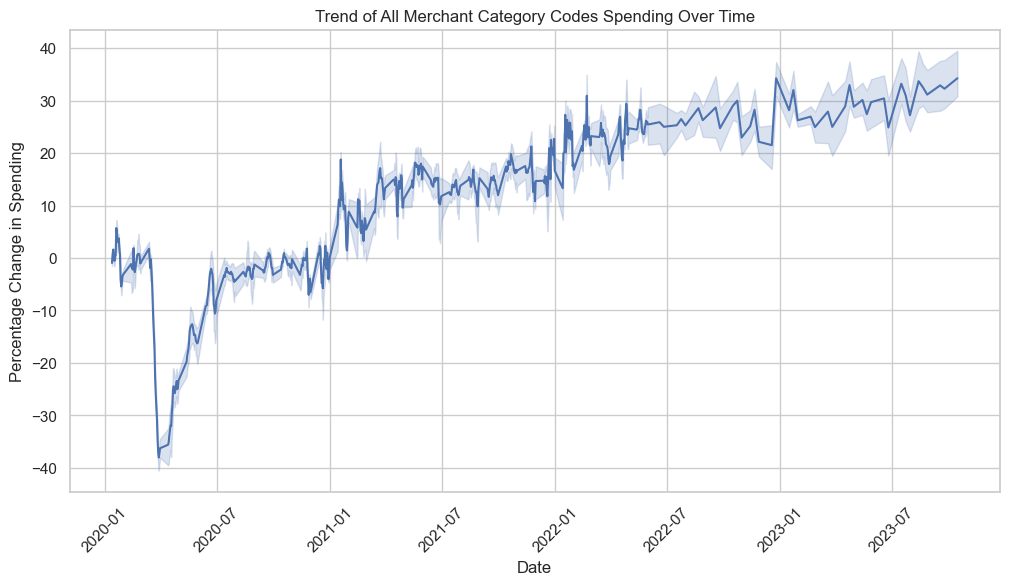

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime type with error handling
# Use infer_datetime_format=True to automatically infer date formats and use errors='coerce' for unparsable dates
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')

# Set the plot style
sns.set(style="whitegrid")

# Time Series plot of 'All merchant category codes spending' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='All merchant category codes spending', data=data)
plt.title('Trend of All Merchant Category Codes Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Spending')
plt.xticks(rotation=45)
plt.show()

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


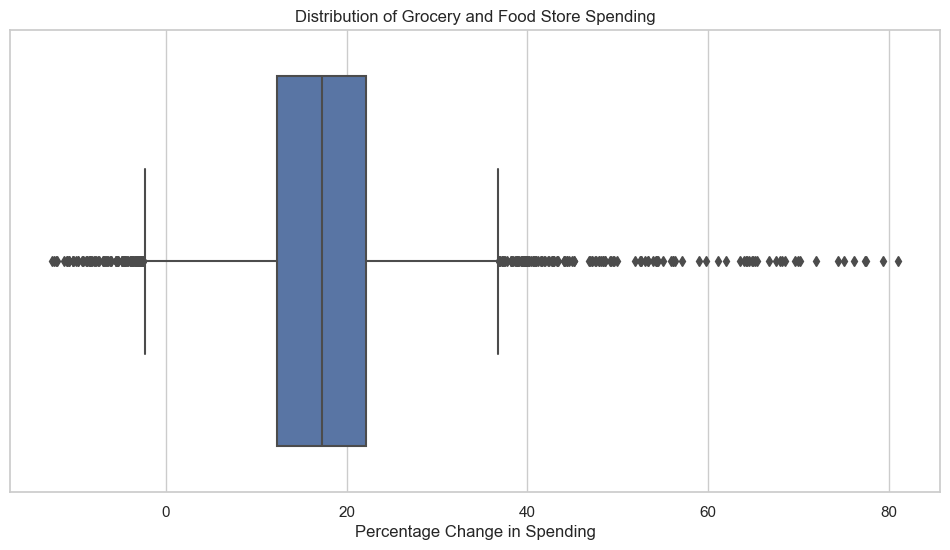

In [5]:
# Boxplot for 'Grocery and food store (GRF) spending'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grocery and food store (GRF)  spending', data=data)
plt.title('Distribution of Grocery and Food Store Spending')
plt.xlabel('Percentage Change in Spending')
plt.show()

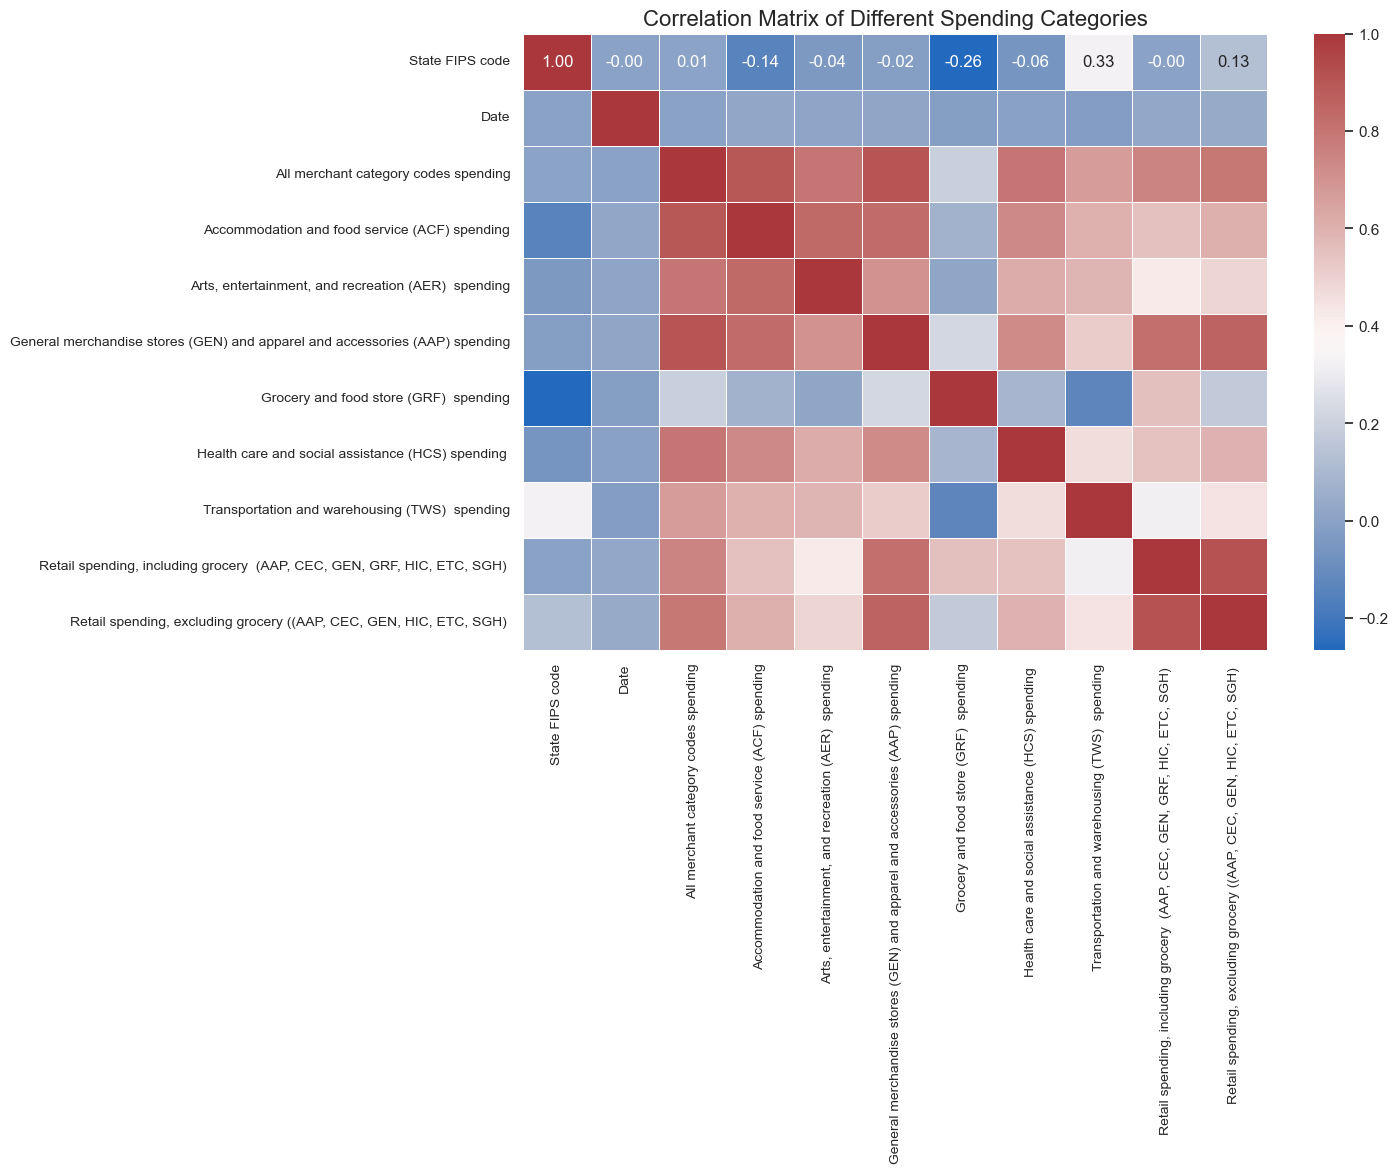

In [6]:
plt.figure(figsize=(12, 8))
# Create heat maps, adjust color mapping, and limit to two decimal places
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='vlag', linewidths=.5)

# Setting title and resizing fonts
plt.title('Correlation Matrix of Different Spending Categories', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handling missing values (Example: Drop rows with missing values)
data = data.dropna()

# Removing duplicates
data = data.drop_duplicates()

# Normalizing column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Data integrity checks (Example: Check unique values in a categorical column)
print("Unique values in 'state_fips_code':", data['state_fips_code'].unique())

Missing values in each column:
 State FIPS code                                                                   0
Date                                                                           1850
All merchant category codes spending                                              0
Accommodation and food service (ACF) spending                                     0
Arts, entertainment, and recreation (AER)  spending                               0
General merchandise stores (GEN) and apparel and accessories (AAP) spending       0
Grocery and food store (GRF)  spending                                            0
Health care and social assistance (HCS) spending                                  0
Transportation and warehousing (TWS)  spending                                    0
Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH)           0
Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)                0
dtype: int64
Unique values in 'state_fips_co

In [8]:
# Display the column names of the DataFrame
print(data.columns)

# Adjust for the actual spelling of the column name
one_hot_encoded_data = pd.get_dummies(data, columns=['state_fips_code'])

# Display one hot encoded data
print(one_hot_encoded_data.head())

Index(['state_fips_code', 'date', 'all_merchant_category_codes_spending',
       'accommodation_and_food_service_(acf)_spending',
       'arts,_entertainment,_and_recreation_(aer)__spending',
       'general_merchandise_stores_(gen)_and_apparel_and_accessories_(aap)_spending',
       'grocery_and_food_store_(grf)__spending',
       'health_care_and_social_assistance_(hcs)_spending_',
       'transportation_and_warehousing_(tws)__spending',
       'retail_spending,_including_grocery__(aap,_cec,_gen,_grf,_hic,_etc,_sgh)_',
       'retail_spending,_excluding_grocery_((aap,_cec,_gen,_hic,_etc,_sgh)_'],
      dtype='object')
        date  all_merchant_category_codes_spending  \
0 2020-01-13                                -1.760   
1 2020-01-13                                -0.220   
2 2020-01-13                                -0.560   
3 2020-01-13                                -0.373   
4 2020-01-13                                -1.850   

   accommodation_and_food_service_(acf)_spendin

In [9]:
from sklearn.preprocessing import StandardScaler


# Select the column to be scaled
features_to_scale = data[['all_merchant_category_codes_spending',
       'accommodation_and_food_service_(acf)_spending',
       'arts,_entertainment,_and_recreation_(aer)__spending',
       'general_merchandise_stores_(gen)_and_apparel_and_accessories_(aap)_spending',
       'grocery_and_food_store_(grf)__spending',
       'health_care_and_social_assistance_(hcs)_spending_',
       'transportation_and_warehousing_(tws)__spending',
       'retail_spending,_including_grocery__(aap,_cec,_gen,_grf,_hic,_etc,_sgh)_',
       'retail_spending,_excluding_grocery_((aap,_cec,_gen,_hic,_etc,_sgh)_']]  # 根据需要添加或删除列

# Initialize the standardizer
scaler = StandardScaler()

# Apply
scaled_features = scaler.fit_transform(features_to_scale)

# Convert scaled data back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Show scaled data
print(scaled_data.head())

   all_merchant_category_codes_spending  \
0                             -0.690911   
1                             -0.587159   
2                             -0.610065   
3                             -0.597467   
4                             -0.696974   

   accommodation_and_food_service_(acf)_spending  \
0                                       0.061436   
1                                       0.179863   
2                                       0.124251   
3                                       0.133053   
4                                      -0.321453   

   arts,_entertainment,_and_recreation_(aer)__spending  \
0                                          -0.038834     
1                                          -0.044803     
2                                           0.026833     
3                                          -0.041818     
4                                          -0.197031     

   general_merchandise_stores_(gen)_and_apparel_and_accessories_(aap)_spending 

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

In [10]:
# Convert 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Extract features from 'date'
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Weekday'] = data['date'].dt.weekday




# Display of processed data
print(data.head())

   state_fips_code       date  all_merchant_category_codes_spending  \
0              900 2020-01-13                                -1.760   
1             2500 2020-01-13                                -0.220   
2             3400 2020-01-13                                -0.560   
3             3600 2020-01-13                                -0.373   
4             4400 2020-01-13                                -1.850   

   accommodation_and_food_service_(acf)_spending  \
0                                          -5.43   
1                                          -2.47   
2                                          -3.86   
3                                          -3.64   
4                                         -15.00   

   arts,_entertainment,_and_recreation_(aer)__spending  \
0                                              -13.8     
1                                              -14.0     
2                                              -11.6     
3                           

In [11]:
# Step 1: Import the required models and assessment tools
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [12]:
# Step 2: Divide the dataset
# Have completed feature engineering and data preprocessing, next need to divide the dataset into a training set and a test set
# Separate features and target variables
X = data.drop(['all_merchant_category_codes_spending', 'date', 'state_fips_code'], axis=1)
y = data['all_merchant_category_codes_spending']

# Delineate data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Step 3: Train the model
# Select and train three different regression models
# Initialize the model
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

# Training models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages

RandomForestRegressor()

In [14]:
# Step 4: Evaluate the model
# Evaluate the model using the test data set
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

mse1, r2_1 = evaluate_model(model1, X_test, y_test)
mse2, r2_2 = evaluate_model(model2, X_test, y_test)
mse3, r2_3 = evaluate_model(model3, X_test, y_test)

C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages

In [15]:
# Step 5: Performance Comparison Table
# Create a performance comparison table that compares the MSE and R² of different models
performance_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse1, mse2, mse3],
    'R²': [r2_1, r2_2, r2_3]
})

print(performance_comparison)

               Model        MSE        R²
0  Linear Regression   9.353999  0.960831
1      Decision Tree  10.388077  0.956501
2      Random Forest   5.172954  0.978339


C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


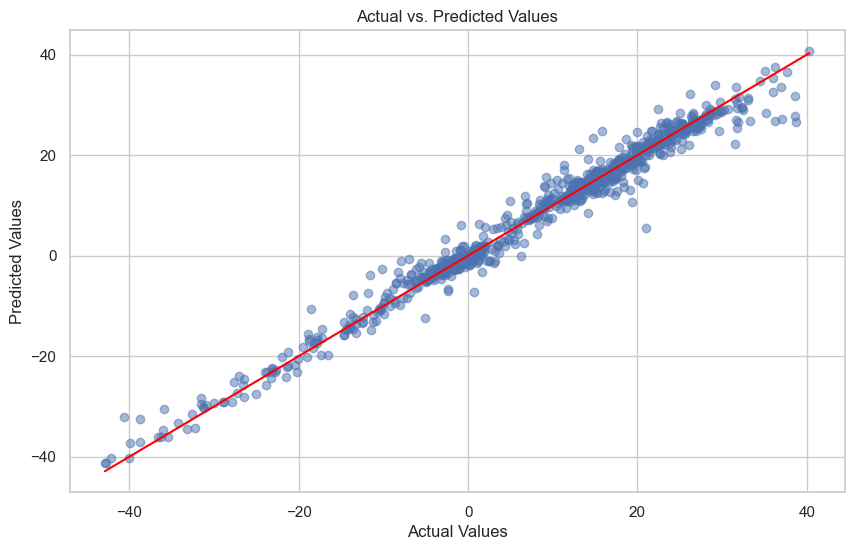

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict with the Random Forest model
rf_predictions = model3.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Reference line
plt.show()

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


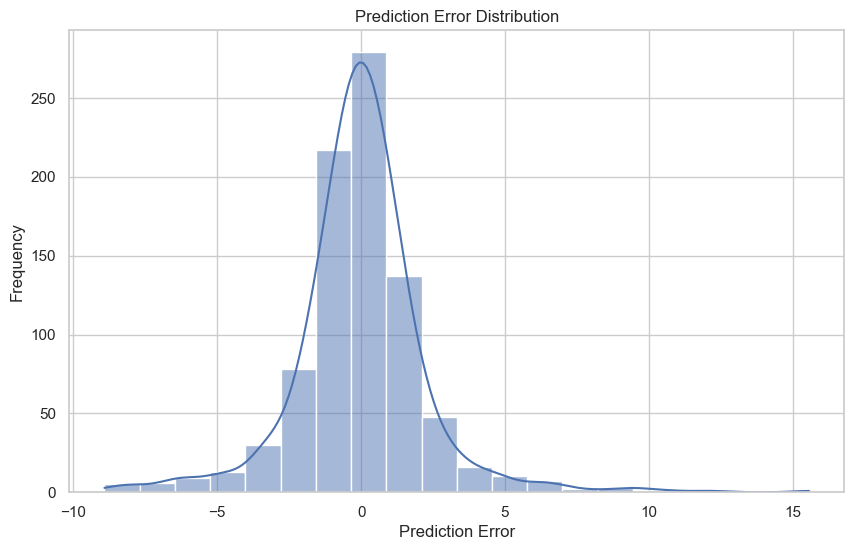

In [17]:
errors = y_test - rf_predictions  # Calculate errors

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()

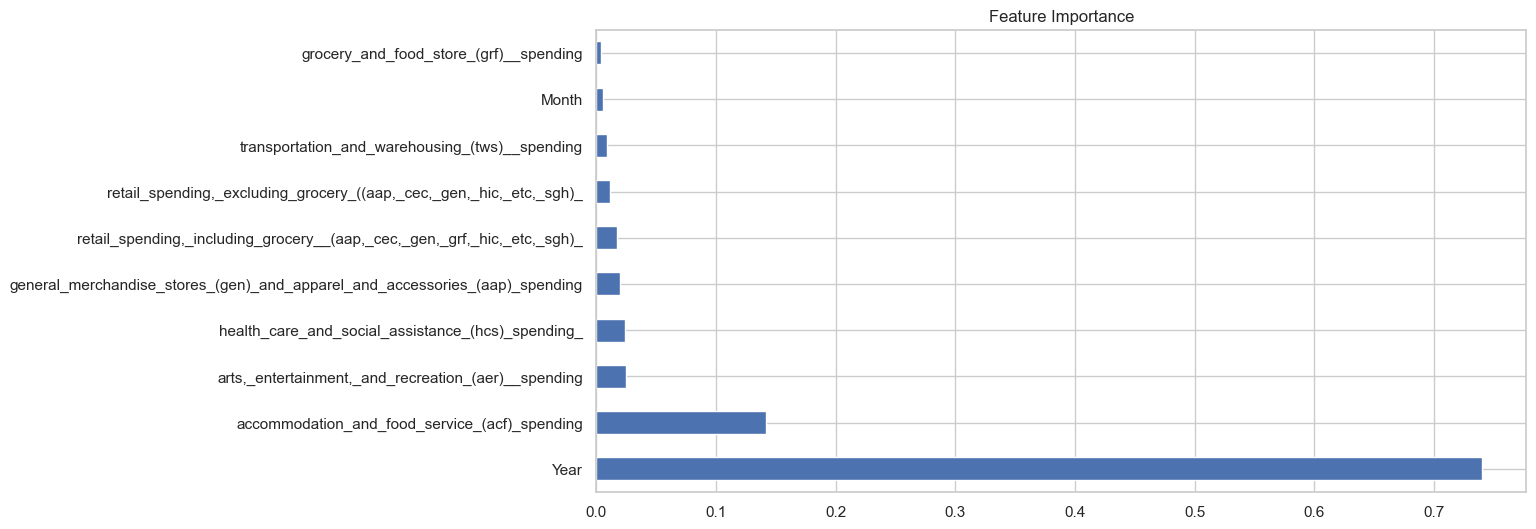

In [18]:
feature_importances = pd.Series(model3.feature_importances_, index=X_train.columns)

plt.figure(figsize=(12, 6))
feature_importances.nlargest(10).plot(kind='barh')  # Display top 10 features
plt.title('Feature Importance')
plt.show()